In [1]:
import pandas as pd
import pickle,os, copy
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
import sys
sys.path.append(".")


import re

from deep_generalizability.nets import Nets
from deep_generalizability.utils import *
from deep_generalizability.postprocessing.postprocessing import *
from deep_generalizability.postprocessing.stats_plotting import *
from deep_generalizability.save_load import *

%load_ext autoreload
%autoreload 2

In [33]:
root_folder = os.environ["PATH_TO_DEEP_FOLDER"]
data_name = "gaussian"
exp = "Aug26_23-40-28_Daniels-MacBook-Pro-4.local"
experiment_folder = os.path.join(root_folder, "experiments", data_name, exp)

In [39]:
ms = get_all_models(experiment_folder, -1)

In [42]:
m = ms["1598478172.7653918"]["0"]

m.state_dict()

OrderedDict([('fc_layer.weight', tensor([[-0.7201,  0.6141]])),
             ('fc_layer.bias', tensor([0.0829]))])

In [34]:
stats_df = get_end_stats(experiment_folder)


In [35]:
stats_df.sort_values(by="Acc Test Max", ascending=False)

,Acc Gap Mean,Acc Test Max,Acc Test Mean,Acc Test Min,Acc Train Max,Acc Train Mean,Acc Train Min,Loss Test Max,Loss Test Mean,Loss Test Min,Loss Train Max,Loss Train Mean,Loss Train Min,Norm Max,Norm Mean,Norm Min,batch_train_size,learning_rate
1598478172.7653918,-0.044,0.715,0.715,0.715,0.759,0.759,0.759,0.822704,0.822704,0.822704,0.761264,0.761264,0.761264,0.911490,0.911490,0.911490,8,0.1
1598478070.944814,-0.010,0.710,0.710,0.710,0.720,0.720,0.720,0.813795,0.813795,0.813795,0.800795,0.800795,0.800795,0.690414,0.690414,0.690414,16,0.000215443
1598478070.506054,-0.010,0.710,0.710,0.710,0.720,0.720,0.720,0.813811,0.813811,0.813811,0.800810,0.800810,0.800810,0.690193,0.690193,0.690193,8,0.000215443
1598478070.921655,-0.010,0.710,0.710,0.710,0.720,0.720,0.720,0.813759,0.813759,0.813759,0.800758,0.800758,0.800758,0.690740,0.690740,0.690740,32,0.000215443
1598478070.4946308,-0.059,0.705,0.705,0.705,0.764,0.764,0.764,0.791492,0.791492,0.791492,0.765722,0.765722,0.765722,0.741851,0.741851,0.741851,32,0.000464159
1598478071.38451,-0.059,0.705,0.705,0.705,0.764,0.764,0.764,0.791497,0.791497,0.791497,0.765732,0.765732,0.765732,0.741222,0.741222,0.741222,16,0.000464159
1598478128.896322,-0.059,0.705,0.705,0.705,0.764,0.764,0.764,0.795628,0.795628,0.795628,0.751928,0.751928,0.751928,0.755360,0.755360,0.755360,16,0.0215443
1598478070.53559,-0.059,0.705,0.705,0.705,0.764,0.764,0.764,0.791500,0.791500,0.791500,0.765729,0.765729,0.765729,0.740899,0.740899,0.740899,8,0.000464159
1598478117.86958,-0.061,0.700,0.700,0.700,0.761,0.761,0.761,0.796704,0.796704,0.796704,0.751589,0.751589,0.751589,0.788731,0.788731,0.788731,16,0.00215443
1598478129.008914,-0.064,0.700,0.700,0.700,0.764,0.764,0.764,0.797719,0.797719,0.797719,0.751601,0.751601,0.751601,0.788994,0.788994,0.788994,32,0.01


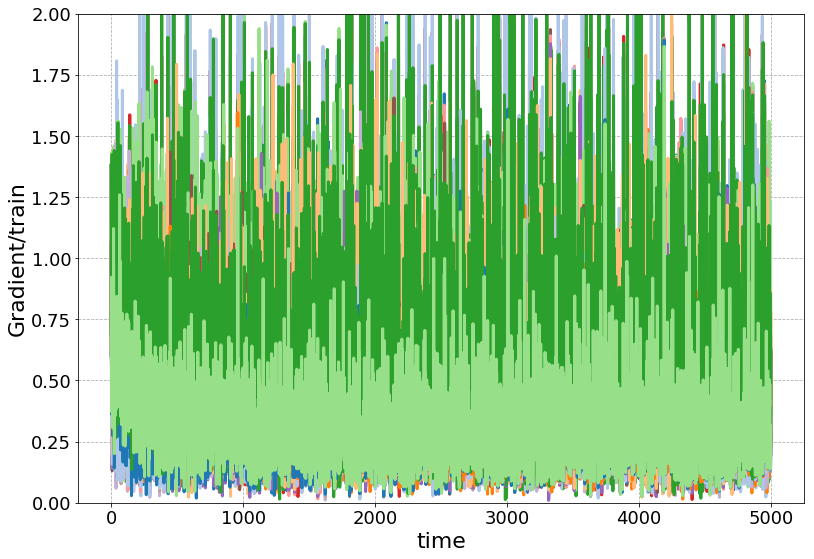

In [37]:
# Plot timeseries
metric_name = "Gradient/train"
X_axis_name = "time"
Y_axis_name = metric_name # "train loss"

plot_name = None
X_axis_bounds = None
Y_axis_bounds = [0, 2]

save_exp_path = None

filter_seperate = None
filter_not_seperate = None

pre_filtered_exp_ids = None

data_func = timeseries_plot(experiment_folder, metric_name)

hp_data_func_plot(experiment_folder, data_func, X_axis_name, Y_axis_name, 
                  plot_name, filter_seperate, filter_not_seperate,
                 save_exp_path, X_axis_bounds, Y_axis_bounds, 
                    pre_filtered_exp_ids)

1


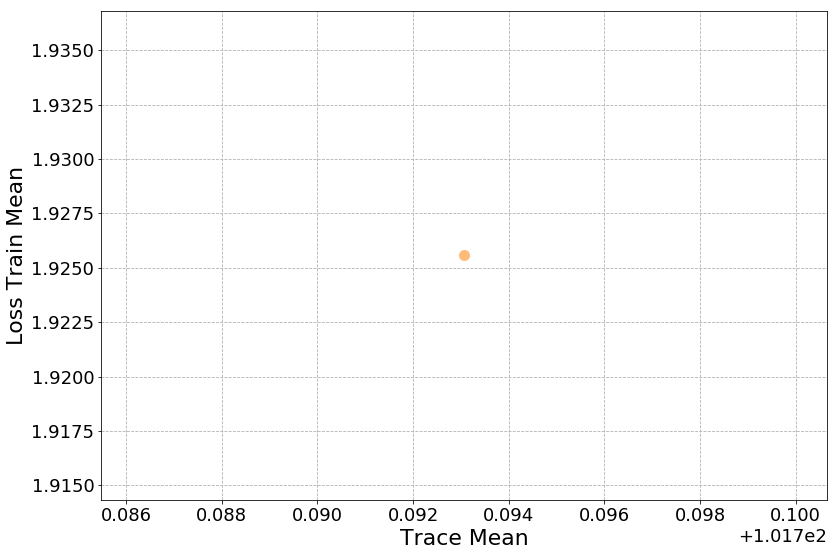

In [45]:
# Plot stats
X_metric = "Trace Mean"
Y_metric = "Loss Train Mean"
X_axis_name = X_metric # "trace"
Y_axis_name = Y_metric # "train loss"

plot_name = None
X_axis_bounds = None
Y_axis_bounds = None

save_exp_path = None

filter_seperate = None
filter_not_seperate = None

pre_filtered_exp_ids = None

data_func = plot_stats(stats_df, X_metric, Y_metric)

hp_data_func_plot(experiment_folder, data_func, X_axis_name, Y_axis_name, 
                  plot_name, filter_seperate, filter_not_seperate,
                 save_exp_path, X_axis_bounds, Y_axis_bounds, 
                  pre_filtered_exp_ids)

Correlation for (0,) softmax_beta/trace:all: nan
Correlation for (1.0,) softmax_beta/trace:all: nan
Correlation for (100.0,) softmax_beta/trace:all: nan
Correlation for (-25.75,) softmax_beta/trace:all: nan
Correlation for (75.25,) softmax_beta/trace:all: nan
Correlation for (-50.5,) softmax_beta/trace:all: nan
Correlation for (50.5,) softmax_beta/trace:all: nan
Correlation for (-75.25,) softmax_beta/trace:all: nan
Correlation for (25.75,) softmax_beta/trace:all: nan
Correlation for (-100.0,) softmax_beta/trace:all: nan
Correlation for (-1.0,) softmax_beta/trace:all: nan


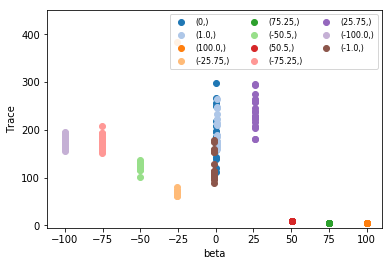

In [108]:
plot_special(exp_dict, "softmax_beta", 
             "trace:all", filter_seperate=[], filter_not_seperate=["softmax_beta"],
             pre_filtered_exp_ids=None,
             save_exp_path=experiment_folder, X_axis_bounds=None, Y_axis_bounds=[-5, 450],
            X_axis_display_name="beta", Y_axis_display_name="Trace", )

In [196]:
x=  np.random.normal(scale=1, size=(1000, 2))
y = 1 * (x[:, 0] >= 0)
ct = 0
def flip(val, alpha):
    should_flip = np.random.uniform(0, 1)<alpha
    global ct
    if should_flip:
        ct += 1
        if val == 0:
            val = 1
        elif val == 1:
            val = 0
    return val
y = [flip(a, 0.05) for a in y]
x += np.random.normal(scale=0.15, size=x.shape)

In [197]:
c = 0
for a, b in zip(x, y):
    if (a[0] < 0) and (b == 1):
        c+=1
    elif (a[0] > 0) and (b == 0):
        c+=1 